In [302]:
import os
import csv
import pandas as pd
import sys

In [303]:
path_to_4x4grid_resco_ppo_eval = "/Users/loveen/Desktop/Masters project/my_resco_eval/IPPO-tr0-grid4x4-0-drq_norm-wait_norm"

In [304]:
agent_ids = ['A0', 'A1', 'A2', 'A3',
                      'B0', 'B1', 'B2', 'B3',
                      'C0', 'C1', 'C2', 'C3',
                      'D0', 'D1', 'D2', 'D3']

In [305]:
metrics_df = pd.read_csv(os.path.join(path_to_4x4grid_resco_ppo_eval, f"metrics_{1}.csv"))

In [306]:
column_row = metrics_df.columns
metrics_df.loc[-1] = column_row

# Step 3: Reindex the DataFrame to move the new row to the top
metrics_df.index = metrics_df.index + 1  # shift index
metrics_df = metrics_df.sort_index()

In [307]:
metrics_df.rename(columns={metrics_df.columns[0]:'step'}, inplace=True)

In [308]:
reward_label_mappings = dict(zip(list(metrics_df.columns[1:17]),[f"reward_{id}" for id in agent_ids]))

In [309]:
max_queue_label_mappings = dict(zip(list(metrics_df.columns[17:33]),[f"max_q_{id}" for id in agent_ids]))

In [310]:
queue_len_label_mappings = dict(zip(list(metrics_df.columns[33:50]),[f"q_len_{id}" for id in agent_ids]))

In [311]:
metrics_df.rename(columns=dict(reward_label_mappings), inplace=True)
metrics_df.rename(columns=dict(max_queue_label_mappings), inplace=True)
metrics_df.rename(columns=dict(queue_len_label_mappings), inplace=True)

In [312]:
metrics_df.drop(columns=[' '], inplace=True)

In [474]:
import json
import re 

def add_closing_bracket(cell):
    """
    Adds a closing bracket '}' to the string if it is missing.
    
    Parameters:
    cell (str): The string to be checked and potentially modified.
    
    Returns:
    str: The modified string with a closing bracket if it was missing.
    """
    if isinstance(cell, str):
        if not cell.endswith(('}','} ', '} ')):
            cell = cell + '}'
        if not cell.startswith((' {', '{', '  {')):
            cell = '{' + cell
    return cell

def extract_value(cell):
    if isinstance(cell, str):
        # Remove leading/trailing brackets and split by colon
        cell = cell.strip('{} ')
        parts = cell.split(':')
        if len(parts) > 1:
            return parts[1].strip()
    return cell

def replace_wierd_char(cell):
    if isinstance(cell, str):
        if '{' in cell:
            cell = cell.replace("{", '')
        if '}' in cell:
            cell = cell.replace("}", '')
    return cell

In [498]:
def data_transformation_pipeline(metrics_df):
    column_row = metrics_df.columns
    metrics_df.loc[-1] = column_row

    # Step 3: Reindex the DataFrame to move the new row to the top
    metrics_df.index = metrics_df.index + 1  # shift index
    metrics_df = metrics_df.sort_index()

    metrics_df.rename(columns={metrics_df.columns[0]:'step'}, inplace=True)
    
    reward_label_mappings = dict(zip(list(metrics_df.columns[1:17]),[f"reward_{id}" for id in agent_ids]))
    max_queue_label_mappings = dict(zip(list(metrics_df.columns[17:33]),[f"max_q_{id}" for id in agent_ids]))

    queue_len_label_mappings = dict(zip(list(metrics_df.columns[33:50]),[f"q_len_{id}" for id in agent_ids]))
    
    metrics_df.rename(columns=dict(reward_label_mappings), inplace=True)
    metrics_df.rename(columns=dict(max_queue_label_mappings), inplace=True)
    metrics_df.rename(columns=dict(queue_len_label_mappings), inplace=True)

    metrics_df.drop(columns=[' '], inplace=True)

    closed_brackets_data = metrics_df.map(add_closing_bracket)
    extracted_value = closed_brackets_data.map(extract_value)
    removed_wierd_brackets = extracted_value.map(replace_wierd_char)

    convert_to_float = removed_wierd_brackets.astype(float)
    
    return convert_to_float

In [499]:
metrics_df = pd.read_csv(os.path.join(path_to_4x4grid_resco_ppo_eval, f"metrics_{1}.csv"))

transormed_data = data_transformation_pipeline(metrics_df)

In [500]:
def contains_brackets(cell):
    return '{' in cell or '}' in cell if isinstance(cell, str) else False

In [501]:
has_wierd_brackers_locations = transormed_data.map(contains_brackets).stack()

# Filter the True values
locations = has_wierd_brackers_locations[has_wierd_brackers_locations]
# Print the locations
print("Locations of cells containing '{' or '}':")
print(locations.index.tolist())

Locations of cells containing '{' or '}':
[]


In [516]:
all_processed_data = []

for i in range(1, 101):
    metrics_df = pd.read_csv(os.path.join(path_to_4x4grid_resco_ppo_eval, f"metrics_{i}.csv"))
    processed_data = data_transformation_pipeline(metrics_df)
    all_processed_data.append(processed_data)

all_concat_data = pd.concat(all_processed_data, axis=1)

In [521]:
all_concat_data = pd.concat(all_processed_data, axis=0)
all_concat_data_mean = all_concat_data.groupby(all_concat_data.index).mean()

In [580]:
all_concat_data_mean

,step,reward_A0,reward_A1,reward_A2,reward_A3,reward_B0,reward_B1,reward_B2,reward_B3,reward_C0,...,q_len_B2,q_len_B3,q_len_C0,q_len_C1,q_len_C2,q_len_C3,q_len_D0,q_len_D1,q_len_D2,q_len_D3
0,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10
1,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,15.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,20.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,25.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3580.0,-0.289687,-0.406473,-0.429241,-0.277545,-1.187991,-2.085313,-0.696741,-0.748929,-0.200536,...,6.18,10.21,2.86,17.76,1.65,21.45,2.41,5.73,2.64,2.38
716,3585.0,-0.286295,-0.406875,-0.424375,-0.276607,-1.191518,-2.083348,-0.699063,-0.743616,-0.203214,...,6.18,10.21,2.81,17.78,1.59,21.41,2.37,5.70,2.73,2.41
717,3590.0,-0.278661,-0.409554,-0.414777,-0.268616,-1.194866,-2.076652,-0.702723,-0.742054,-0.203482,...,6.21,10.18,2.80,17.74,1.57,21.43,2.40,5.65,2.74,2.38
718,3595.0,-0.281964,-0.406696,-0.417679,-0.273036,-1.196786,-2.073527,-0.703304,-0.742589,-0.192545,...,6.19,10.21,2.76,17.78,1.55,21.40,2.39,5.63,2.74,2.32


In [581]:
summed_data = all_concat_data_mean.iloc[:, 1:].mean()

In [591]:
summed_data_wait_norm = summed_data.iloc[0:16]

In [592]:
summed_data_max_queue = summed_data.iloc[16:32]

In [593]:
summed_data_queue_length = summed_data.iloc[32:50]

In [594]:
summed_data_wait_norm

reward_A0   -0.207854
reward_A1   -0.244545
reward_A2   -0.331235
reward_A3   -0.248208
reward_B0   -0.614906
reward_B1   -1.119665
reward_B2   -0.325994
reward_B3   -0.403068
reward_C0   -0.200419
reward_C1   -0.956670
reward_C2   -0.136861
reward_C3   -0.706905
reward_D0   -0.288890
reward_D1   -0.327348
reward_D2   -0.218743
reward_D3   -0.175573
dtype: float64

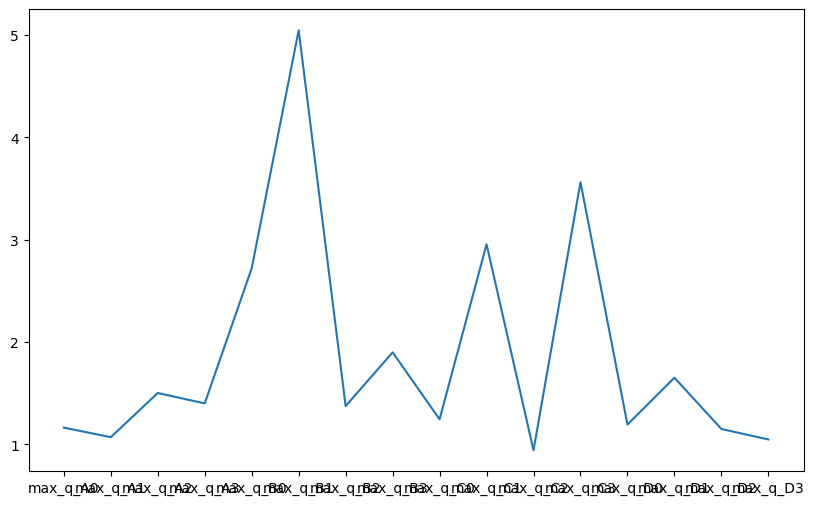

In [585]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(summed_data_max_queue)
plt.show()

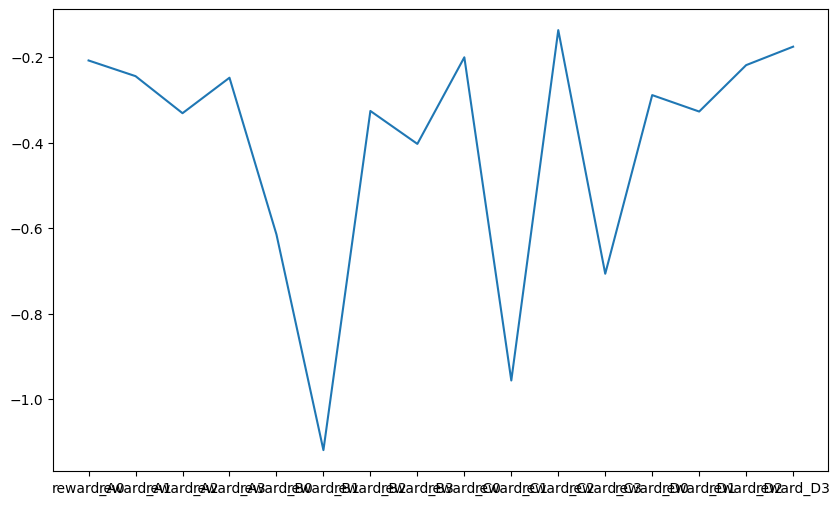

In [586]:
plt.figure(figsize=(10,6))
plt.plot(summed_data_reward)
plt.show()

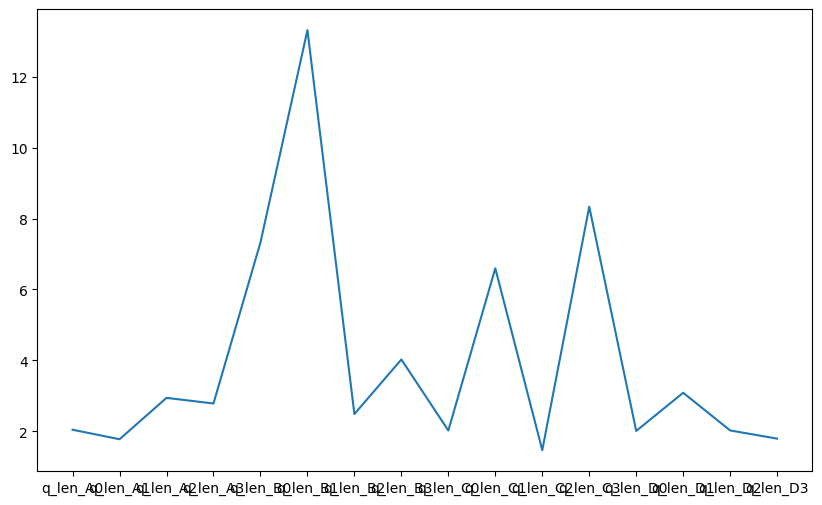

In [587]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(summed_data_queue_length)
plt.show()

## actual results from RESCO 4X4

Avg. Delay

4x4 Grid
Greedy 34.32
Max Pressure 52.55
IDQN 32.95 +- 0.26
MPLight 46.91 +- 0.95
IPPO 44.0 +- 0.0
FMA2C 99.77 +- 0.0

Avg. Wait

4x4 Grid
IDQN 11.59 +- 0.22
MPLight 20.21 +- 0.71
IPPO 18.93 +- 0.0
FMA2C 71.42 +- 0.0

Avg. Trip Time

4x4 Grid
IDQN 144.09 +- 0.53
MPLight 157.77 +- 0.89
IPPO 153.96 +- 0.0
FMA2C 209.28 +- 0.0

Avg. Queue

4x4 Grid
IDQN 0.33 +- 0.01
MPLight 0.55 +- 0.02
IPPO 0.5 +- 0.0
FMA2C 1.74 +- 0.0
